## DS 862 Machine Learning for Business Analysts Fall 2020

### Topic Modeling

#### Submitted by:
* Di Wang

For this assignment, we will use the ABC News data set found [here](https://www.kaggle.com/therohk/million-headlines). The goal is to create topics from the news.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
#import scipy as sp
#import sklearn
#import sys
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from wordcloud import WordCloud

In [2]:
data = pd.read_csv('abcnews-date-text.csv', error_bad_lines=False)
# We only need the Headlines_text column from the data
# Also this is a huge dataset, let's only use the first 30000 lines
data_text = data['headline_text'][:30000]

In [3]:
data_text.head()

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object

We will use both LDA and NMF to try to discover topics from these news.

# LDA

First use LDA to discover topics. Use bag of word to create your data matrix. In particular, try two different settings for bag of word (i.e. different hyperparameters). For each setting, select the most appropriate number of topics between the range of 1 to 10. Report the following results: 
- For each setting, try to come up with an explanation to each topic discovered. 
- Give a topic (or topics) to the first 5 news in the data set.

Note there is no right or wrong answer here.

#### Setting 1

In [4]:
# Apply Bag-of-Word to our documents
bow1 = CountVectorizer(stop_words = 'english', min_df = 5, # remove the very uncommon words
                       token_pattern = r'\b[^\d\W]+\b') # remove the numbers
documents_bow1 = bow1.fit_transform(data_text)
documents_bow1.shape

(30000, 4958)

With 30000 documents, we have 4958 unique vocabularies (after cleaning).

Topics discovered:

In [5]:
# Fit the model with different k values (range of 1 to 10)
scores = []
for k in range(1, 10):
    lda = LatentDirichletAllocation(n_components=k, random_state = 123)
    lda.fit(documents_bow1) # Fit the model
    scores.append(lda.score(documents_bow1)) # Obtain the loglikelihood score

print(scores)

[-1013701.5245644364, -1021337.5167631186, -1030922.642314671, -1036393.9101263133, -1039677.2942045178, -1043143.6990485471, -1042155.121646647, -1044940.5283012608, -1044634.8714426045]


In [6]:
print('We shoud use', np.argmax(scores)+1 ,'topics.')

We shoud use 1 topics.


In [7]:
lda1 = LatentDirichletAllocation(n_components=np.argmax(scores)+1, random_state = 123)
lda1_results = lda1.fit_transform(documents_bow1)
lda1.components_

array([[ 9., 16., 10., ..., 10.,  6., 10.]])

In [8]:
# Let's put it in a pretty form
topics = pd.DataFrame(lda1.components_, columns=bow1.get_feature_names())
topics

,aba,abalone,abandon,abandoned,abare,abattoir,abbas,abbott,abc,abduction,...,youths,zabel,zealand,zidane,zim,zimbabwe,zone,zones,zoning,zoo
0,9.0,16.0,10.0,8.0,7.0,25.0,6.0,16.0,34.0,9.0,...,9.0,7.0,34.0,6.0,10.0,70.0,29.0,10.0,6.0,10.0


In [9]:
# Display the top words for each topic
def show_topics(word_topic_matrix, word_labels, num_top_words=5):
    top_words_func = lambda x: [word_labels[i] for i in np.argsort(x)[:-num_top_words-1:-1]]
    topic_words = ([top_words_func(i) for i in word_topic_matrix])
    return [' '.join(x) for x in topic_words]


# Apply it on the LDA result
show_topics(lda1.components_, bow1.get_feature_names())

['police govt new iraq man']

Looks like having 1 topic will maximizes the loglikelihood value. The top 5 words for this topic are: police govt new iraq man. The news could be about iraq wars and government reaction. 

News topics:

In [10]:
new_topic1 = [i[0] for i in sorted(enumerate(lda1_results[:, 0]), key=lambda x:x[1], reverse=True)][0:5]

for i in new_topic1:
    print(data_text[i])
    print(lda1_results[i])
    print('\n****************************************\n')

aba decides against community broadcasting licence
[1.]

****************************************

act fire witnesses must be aware of defamation
[1.]

****************************************

a g calls for infrastructure protection summit
[1.]

****************************************

air nz staff in aust strike for pay rise
[1.]

****************************************

air nz strike to affect australian travellers
[1.]

****************************************



Becuse there is only one topic, so it will show the top 5 news of the dataset.

#### Setting 2

In [11]:
# Apply Bag-of-Word to our documents
bow2 = CountVectorizer(stop_words = 'english', max_df = 300, # remove the very common words 
                       token_pattern = r'\b[^\d\W]+\b') # remove the numbers
documents_bow2 = bow2.fit_transform(data_text)
documents_bow2.shape

(30000, 16427)

With 30000 documents, we have 16427 unique vocabularies (after cleaning).

Topics discovered:

In [12]:
# Fit the model with different k values (range of 1 to 10)
scores = []
for k in range(1, 10):
    lda = LatentDirichletAllocation(n_components=k, random_state = 123)
    lda.fit(documents_bow2) # Fit the model
    scores.append(lda.score(documents_bow2)) # Obtain the loglikelihood score

print(scores)

[-1209742.298808635, -1224741.7103774538, -1237785.3346398785, -1249527.9818544455, -1258085.4266173996, -1262843.7112023032, -1267946.7626065365, -1270837.1590469067, -1274110.0839148874]


In [13]:
print('We shoud use', np.argmax(scores)+1 ,'topics.')

We shoud use 1 topics.


In [14]:
lda2 = LatentDirichletAllocation(n_components=np.argmax(scores)+1, random_state = 123)
lda2_results = lda2.fit_transform(documents_bow2)
lda2.components_

array([[4., 2., 2., ..., 2., 5., 2.]])

In [15]:
# Let's put it in a pretty form
topics = pd.DataFrame(lda2.components_, columns=bow2.get_feature_names())
topics

,aa,aac,aagaard,aagard,aapa,aargau,aba,abalone,abandon,abandoned,...,zombie,zoncolan,zone,zones,zoning,zoo,zoos,zurich,zvonareva,zyl
0,4.0,2.0,2.0,2.0,2.0,2.0,9.0,16.0,10.0,8.0,...,2.0,2.0,29.0,10.0,6.0,10.0,2.0,2.0,5.0,2.0


In [16]:
# Display the top words for each topic
show_topics(lda2.components_, bow2.get_feature_names())

['qld killed report urged world']

Looks like having 1 topic will maximizes the loglikelihood value. The top words for this topic are: qld killed report urged world. The news could be about reported wars in some countries that killed many people.

News topics:

In [17]:
new_topic2 = [i[0] for i in sorted(enumerate(lda2_results[:, 0]), key=lambda x:x[1], reverse=True)][0:5]

for i in new_topic2:
    print(data_text[i])
    print(lda2_results[i])
    print('\n****************************************\n')

aba decides against community broadcasting licence
[1.]

****************************************

act fire witnesses must be aware of defamation
[1.]

****************************************

a g calls for infrastructure protection summit
[1.]

****************************************

air nz staff in aust strike for pay rise
[1.]

****************************************

air nz strike to affect australian travellers
[1.]

****************************************



Becuse there is only one topic, so it will show the top 5 news of the dataset.

# NMF

Now for NMF, do the same thing as LDA. Use two settings to create the word count matrix (based on TFIDF), and choose the appropriate number of topics from the range k = 1, .., 10.

#### Setting 1

In [18]:
tfidf1 = TfidfVectorizer(stop_words='english', min_df=.0001, # remove the very uncommon words
                         token_pattern = r'\b[^\d\W]+\b') # remove the numbers
documents_tfidf1 = tfidf1.fit_transform(data_text)
documents_tfidf1.shape

(30000, 7247)

With 30000 documents, we have 7247 unique vocabularies (after cleaning).

Topics discovered: 

In [19]:
# A function to fit NMF and return the error
def nmf_error(V, k):
    nmf = NMF(n_components=k, max_iter=1000, init = 'nndsvd')
    W = nmf.fit_transform(V)
    H = nmf.components_
    return nmf.reconstruction_err_

# A function to plot the error for each k value
def nmf_error_graph(V, min_k=1, max_k=1):
    rss = [nmf_error(V, i) for i in range(min_k, max_k+1)]
    plt.plot(range(min_k, max_k+1), rss)
    plt.xticks(range(min_k, max_k+1))
    plt.xlabel("number of latent topics, k")
    plt.ylabel('RSS')

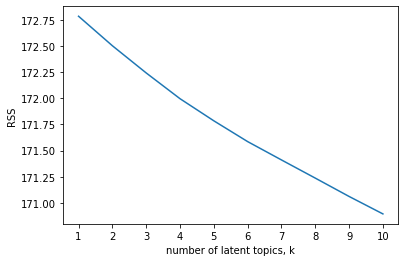

In [20]:
nmf_error_graph(documents_tfidf1, 1, 10)

Looks like we have a shift in the slope of reconstruction error right at k=3, so I will use 3 components.

In [21]:
#Run NMF on the data with 3 components
nmf1 = NMF(n_components = 3, max_iter = 1000, init = 'nndsvd') 
W = nmf1.fit_transform(documents_tfidf1)
H = nmf1.components_

In [22]:
#Look at the words for each topic
show_topics(H, tfidf1.get_feature_names())

['police probe investigate death crash',
 'govt iraq new war council',
 'man court face charged murder']

The top words for the 3 topics are: topic(1) police probe investigate death crash, topic(2) govt iraq new war council, and topic(3) man court face charged murder. So the news could be about (1) civil investigation, police department and car accident, (2) government policy, council decision and iraq war, (3) criminal case and courts of appeals.

News topics: 

In [23]:
for n in range(3):
    print ('\n new topic \n')
    new_topic3 = [i[0] for i in sorted(enumerate(W[:, n]), key=lambda x:x[1], reverse=True)][0:5]

    for i in new_topic3:
        print(data_text[i])
        print(W[i])
        print('\n****************************************\n')
    n+=1


 new topic 

police probe motorcyclists death
[0.16825207 0.         0.        ]

****************************************

police probe cherbourg death
[0.16825207 0.         0.        ]

****************************************

police call off search for canoe
[0.15739102 0.         0.        ]

****************************************

police under fire over road pursuits
[0.1562623 0.        0.       ]

****************************************

police probe car crash
[0.14967727 0.         0.01293535]

****************************************


 new topic 

govt stepping back from iraq claims rudd
[0.        0.1351936 0.       ]

****************************************

govt deciding on sending more troops to iraq
[0.         0.12688782 0.        ]

****************************************

govt resists calls for iraq intelligence probe
[0.02050878 0.12424846 0.        ]

****************************************

us poets rise up against war on iraq
[0.         0.12174696 0.    

#### Setting 2

In [24]:
tfidf2 = TfidfVectorizer(stop_words='english', max_df=.05, # remove the very common words
                         token_pattern = r'\b[^\d\W]+\b') # remove the numbers
documents_tfidf2 = tfidf2.fit_transform(data_text)
documents_tfidf2.shape

(30000, 16444)

With 30000 documents, we have 16444 unique vocabularies (after cleaning).

Topics discovered: 

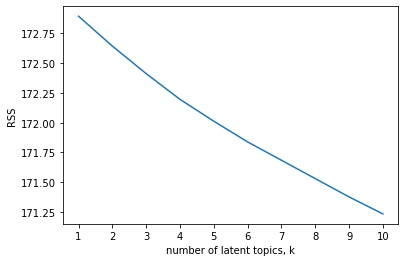

In [25]:
#Plot the error for each k value
nmf_error_graph(documents_tfidf2, 1, 10)

Looks like we have a shift in the slope of reconstruction error right at k=4, so I will use 4 components.

In [26]:
#Run NMF on the data with 4 components
nmf2 = NMF(n_components = 4, max_iter = 1000, init = 'nndsvd') 
W = nmf2.fit_transform(documents_tfidf2)
H = nmf2.components_

In [27]:
#Look at the words for each topic
show_topics(H, tfidf2.get_feature_names())

['police probe investigate crash death',
 'govt new council nsw plan',
 'man court face charged murder',
 'iraq war says troops anti']

The top words for the 4 topics are: topic(1) police probe investigate crash death, topic(2) govt new council nsw plan, topic(3) man court face charged murder, and topic(4) iraq war says troops anti. So the news could be about (1) civil investigation, police department and car accident,(2) government new plan under council, (3) criminal case and courts of appeals, (4) iraq wars and troops.

News topics: 

In [28]:
for n in range(4):
    print ('\n new topic \n')
    new_topic4 = [i[0] for i in sorted(enumerate(W[:, n]), key=lambda x:x[1], reverse=True)][0:5]

    for i in new_topic4:
        print(data_text[i])
        print(W[i])
        print('\n****************************************\n')
    n+=1


 new topic 

police probe car crash
[0.15528543 0.         0.01066277 0.        ]

****************************************

police probe body find
[0.15166256 0.         0.         0.        ]

****************************************

police probe fatal car crash
[0.14255707 0.         0.01103318 0.        ]

****************************************

police probe fatal car crash
[0.14255707 0.         0.01103318 0.        ]

****************************************

police probe fatal car crash
[0.14255707 0.         0.01103318 0.        ]

****************************************


 new topic 

nsw govt under fire over proposed council
[0.         0.14255144 0.         0.        ]

****************************************

nsw govt considers council clean up funds
[0.         0.13717279 0.         0.        ]

****************************************

wa govt slams call for council funds to fight one
[0.         0.12730934 0.         0.        ]

***********************************

Looks like using NMF based on TFIDF could help us better split the news and choose the topics. 

# Visualization

As a practice, create the word clouds for the topics you discovered in the second setting of LDA. Use 30 words in your word clouds. 

In [29]:
# This function generates a dictionary of top_words with their respective weights.
# The output of this function is a list of dictionaries

def topics_freq_dict(topic_world_matrix, word_labels, num_top_words=30):
    top_words_func = lambda x: [(word_labels[i] ,x[i]) for i in np.argsort(x)[:-num_top_words-1:-1]]
    topic_words_freq = ([top_words_func(i) for i in topic_world_matrix])
    tuple_output = [x for x in topic_words_freq]
    list_dict_word_freq = []
    
    for topic in tuple_output:
        dict_output = {}
        for word_freq in topic:
            dict_output[word_freq[0]] = word_freq[1]
            
        list_dict_word_freq.append(dict_output)
        
    return list_dict_word_freq

[{'police': 1029.99999999998, 'govt': 891.9999999999818, 'new': 772.9999999999822, 'iraq': 754.9999999999626, 'man': 720.9999999999767, 'council': 537.9999999999728, 'war': 527.9999999999764, 'says': 519.9999999999643, 'court': 450.9999999999736, 'plan': 445.9999999999746, 'sars': 407.99999999996845, 'nsw': 363.9999999999673, 'claims': 337.9999999999721, 'water': 336.999999999971, 'win': 325.99999999997056, 'cup': 314.99999999997124, 'iraqi': 308.99999999996885, 'qld': 301.9999999999716, 'killed': 299.99999999997164, 'report': 298.99999999996874, 'urged': 291.9999999999718, 'world': 291.9999999999718, 'wa': 288.99999999997135, 'face': 286.99999999996936, 'concerns': 272.9999999999697, 'set': 271.9999999999716, 'death': 271.9999999999716, 'health': 270.9999999999698, 'boost': 263.9999999999686, 'probe': 262.9999999999694}]


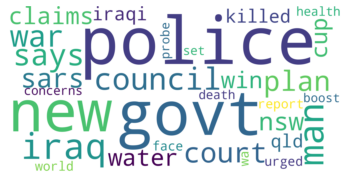

In [30]:
# LDA Result
list_dict_topics = topics_freq_dict(lda1.components_, bow1.get_feature_names(), 30) #list of dictionaries for each topic's top 50 words
print(list_dict_topics)

# Create the word clouds
for dict_topics in list_dict_topics:
    wordcloud = WordCloud(background_color="white", height=1000, width=2000).generate_from_frequencies(dict_topics)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

[{'police': 3.363472006698613, 'probe': 0.829068945530896, 'investigate': 0.4226946821854531, 'crash': 0.40618391269460213, 'death': 0.3554614299150679, 'missing': 0.3219582646224028, 'car': 0.3015267773524052, 'search': 0.29793352085625563, 'fatal': 0.2840470469896123, 'road': 0.2518270392129005, 'victim': 0.2016894462024913, 'seek': 0.1858063176418199, 'help': 0.17052095851806726, 'body': 0.16716701341431486, 'arrest': 0.16480127729147784, 'continue': 0.15726683110394699, 'accident': 0.13179346775792244, 'wa': 0.1295239083595635, 'station': 0.12462252814807132, 'drivers': 0.11360901366741842, 'drug': 0.1087688749624474, 'stabbing': 0.10545630069732984, 'woman': 0.10423951334236713, 'sydney': 0.10090287111618973, 'assault': 0.09734389545748566, 'shooting': 0.09175453940407526, 'hunt': 0.08932610211681419, 'killed': 0.08907659824467602, 'house': 0.08629713841401182, 'blaze': 0.08578290712344275}, {'govt': 2.1596246387941096, 'new': 0.842635451222569, 'council': 0.7211274759937117, 'nsw

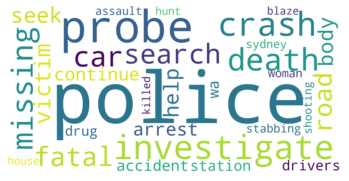

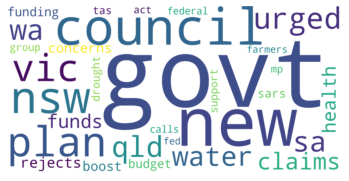

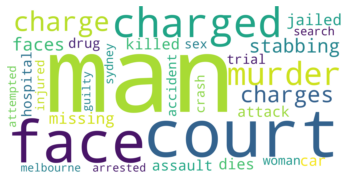

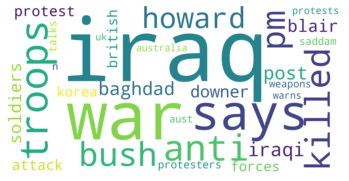

In [31]:
# NMF Result with 4 components
list_dict_topics = topics_freq_dict(H, tfidf2.get_feature_names(), 30) #list of dictionaries for each topic's top 50 words
print(list_dict_topics)

# Create the word clouds
for dict_topics in list_dict_topics:
    wordcloud = WordCloud(background_color="white", height=1000, width=2000).generate_from_frequencies(dict_topics)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### Thank you.